<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>

## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item41">Download Data 
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

<a id="item41"></a>

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork
import wget

from PIL import Image 

In [24]:
wget.download("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip", 'concrete_data_week4.zip')
print("Descarga completada.")

Descarga completada.


After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

<a id="item42"></a>

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense


In [15]:
batch_size = 100
image_resize = 224

In [16]:
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)
validation_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    './concrete_data_week3/train',
    target_size = (image_resize, image_resize),
    batch_size = batch_size,
    class_mode='categorical',
)
validation_generator = validation_datagen.flow_from_directory(
    './concrete_data_week3/valid',
    target_size = (image_resize, image_resize),
    batch_size = batch_size,
    class_mode='categorical',
)

Found 10001 images belonging to 2 classes.
Found 5001 images belonging to 2 classes.


In [17]:
model_vgg16 = Sequential()

model_vgg16.add(VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3)))
model_vgg16.add(GlobalAveragePooling2D())
model_vgg16.add(Dense(2, activation='softmax'))

In [18]:
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)

num_epochs = 2

fit_history = model_vgg16.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch_training,
    epochs = num_epochs,
    validation_data = validation_generator,
    validation_steps = steps_per_epoch_validation,
    verbose= 1
)


c:\Users\patti\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
101/101 ━━━━━━━━━━━━━━━━━━━━ 2542s 25s/step - accuracy: 0.5340 - loss: 3.9737 - val_accuracy: 0.9700 - val_loss: 0.2150
Epoch 2/2
101/101 ━━━━━━━━━━━━━━━━━━━━ 2971s 29s/step - accuracy: 0.9744 - loss: 0.1306 - val_accuracy: 0.9782 - val_loss: 0.1379


In [20]:
model_vgg16.save("classifier_vgg16_model.h5")

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [2]:
from tensorflow.keras.models import load_model

model_resnet = load_model('./classifier_resnet_model.h5')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    './concrete_data_week3/test',
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    shuffle=False
)


Found 5001 images belonging to 2 classes.


In [11]:
score_resnet = model_resnet.evaluate(test_generator, steps=len(test_generator), verbose=1)

print('loss ResNet50:', score_resnet[0])
print('accuracy ResNet50:', score_resnet[1])

c:\Users\patti\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.9895 - loss: 0.0402
loss ResNet50: 0.09616230428218842
accuracy ResNet50: 0.9656068682670593


In [6]:
from tensorflow.keras.models import load_model
model_vgg16 = load_model('./classifier_vgg16_model.h5')

score_vgg16 = model_vgg16.evaluate(test_generator, steps=len(test_generator), verbose=1)

print('loss VGG16:', score_vgg16[0])
print('accuracy VGG16:', score_vgg16[1])

c:\Users\patti\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 683s 13s/step - accuracy: 0.9924 - loss: 0.0478
loss VGG16: 0.13790959119796753
accuracy VGG16: 0.9782043695449829


<a id="item44"></a>

## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input


In [36]:
image_paths = [test_generator.filepaths[i] for i in range(5)]
images = [image.load_img(img_path, target_size=(224, 224)) for img_path in image_paths]

In [37]:
processed_images = np.array([preprocess_input(image.img_to_array(img)) for img in images])

In [38]:
predictions = model_resnet.predict(processed_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


In [39]:
predicted_classes = np.argmax(predictions, axis=1)

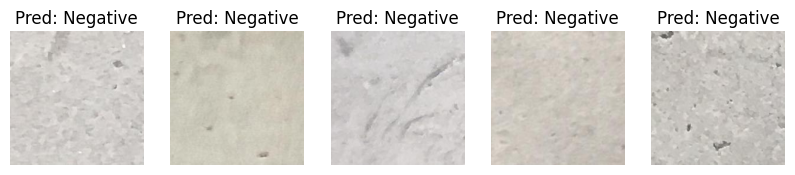

In [40]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.title(f"Pred: {class_labels[predicted_classes[i]]}")
    plt.axis('off')
plt.show()


In [27]:
class_labels = ['Negative', 'Positive']

print("First 5 predictions:")
for i in range(5):
    print(f"{i+1}. {class_labels[predicted_classes[i]]}")

First 5 predictions:
1. Negative
2. Negative
3. Negative
4. Negative
5. Negative


### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).